In [38]:
from vnstock import Vnstock # N·∫°p th∆∞ vi·ªán ƒë·ªÉ s·ª≠ d·ª•ng
stock = Vnstock().stock(symbol='ACB', source='VCI') # ƒê·ªãnh nghƒ©a bi·∫øn vnstock l∆∞u th√¥ng tin m√£ ch·ª©ng kho√°n & ngu·ªìn d·ªØ li·ªáu b·∫°n s·ª≠ d·ª•ng
# C√ÅC D√íNG L·ªÜNH D∆Ø·ªöI ƒê√ÇY C√ì TH·ªÇ THAY TH·∫æ CHO PH√ô H·ª¢P, THAM KH·∫¢O TH√äM H√ÄM KH√ÅC
df = stock.quote.history(start='2000-01-01', end='2024-06-21', interval='1D') # Thi·∫øt l·∫≠p th·ªùi gian t·∫£i d·ªØ li·ªáu v√† khung th·ªùi gian tra c·ª©u l√† 1 ng√†y
print(df.head()) # Hi·ªÉn th·ªã 5 d√≤ng d·ªØ li·ªáu ƒë·∫ßu ti√™n
df.to_csv('gia_lich_su_ohlcv_ACB.csv', index=False) # L∆∞u file Excel

2025-04-25 20:28:10 - vnstock.common.data.data_explorer - INFO - VCI kh√¥ng h·ªó tr·ª£ ki·ªÉm tra c·ªï phi·∫øu. D·ªØ li·ªáu t·ª± ƒë·ªông tr·∫£ v·ªÅ t·ª´ TCBS.


        time  open  high   low  close  volume
0 2006-11-21  4.62  5.78  4.58   5.20   56500
1 2006-11-22  5.52  5.52  5.01   5.20   62300
2 2006-11-23  5.58  5.58  5.01   5.51   69900
3 2006-11-24  5.39  5.85  5.39   5.78   63600
4 2006-11-27  5.65  6.22  5.20   5.47   42400


‚úÖ RMSE tr√™n t·∫≠p test: 6.2043


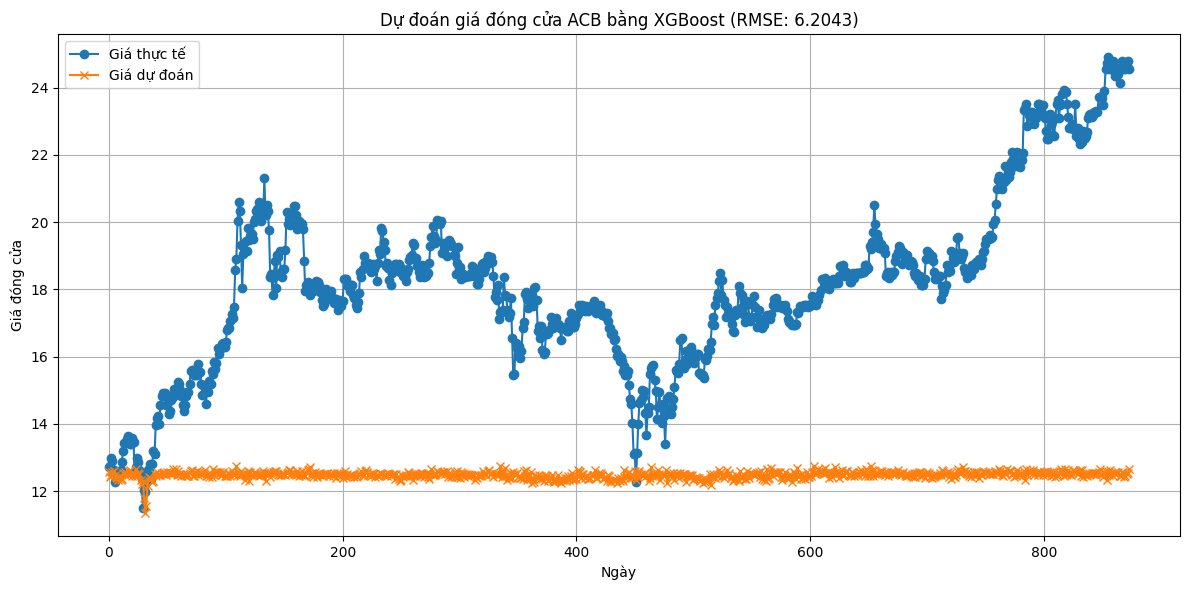


üéØ D·ª± ƒëo√°n gi√° ƒë√≥ng c·ª≠a ACB ng√†y ti·∫øp theo: 12.66 VND


In [42]:
# ======= B∆Ø·ªöC 1: IMPORT TH∆Ø VI·ªÜN =======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ======= B∆Ø·ªöC 2: ƒê·ªåC FILE CSV =======
df = pd.read_csv("gia_lich_su_ohlcv_ACB.csv")

# ======= B∆Ø·ªöC 3: T·∫†O FEATURES =======
df['volatility'] = df['high'] - df['low']                         # Bi√™n ƒë·ªô dao ƒë·ªông
df['return_1d'] = df['close'].pct_change()                        # T·ª∑ l·ªá thay ƒë·ªïi gi√°
df['ma5'] = df['close'].rolling(window=5).mean()                  # Trung b√¨nh 5 phi√™n
df['ma10'] = df['close'].rolling(window=10).mean()                # Trung b√¨nh 10 phi√™n
df['volume_ma5'] = df['volume'].rolling(window=5).mean()
df['volume_ratio'] = df['volume'] / df['volume_ma5']              # Thanh kho·∫£n t∆∞∆°ng ƒë·ªëi

# ======= B∆Ø·ªöC 4: T·∫†O TARGET =======
df['target'] = df['close'].shift(-1)                              # Gi√° ƒë√≥ng c·ª≠a ng√†y h√¥m sau

# ======= B∆Ø·ªöC 5: X·ª¨ L√ù D·ªÆ LI·ªÜU M·∫§T (NaN) =======
df.dropna(inplace=True)

# ======= B∆Ø·ªöC 6: T√ÅCH D·ªÆ LI·ªÜU HU·∫§N LUY·ªÜN =======
features = ['open', 'high', 'low', 'close', 'volume', 'volatility', 
            'return_1d', 'ma5', 'ma10', 'volume_ratio']

X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ======= B∆Ø·ªöC 7: HU·∫§N LUY·ªÜN M√î H√åNH XGBOOST =======
model = xgb.XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# ======= B∆Ø·ªöC 8: D·ª∞ ƒêO√ÅN & ƒê√ÅNH GI√Å =======
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"‚úÖ RMSE tr√™n t·∫≠p test: {rmse:.4f}")

# ======= B∆Ø·ªöC 9: V·∫º BI·ªÇU ƒê·ªí GI√Å D·ª∞ ƒêO√ÅN VS TH·ª∞C T·∫æ =======
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Gi√° th·ª±c t·∫ø', marker='o')
plt.plot(y_pred, label='Gi√° d·ª± ƒëo√°n', marker='x')
plt.title(f'D·ª± ƒëo√°n gi√° ƒë√≥ng c·ª≠a ACB b·∫±ng XGBoost (RMSE: {rmse:.4f})')
plt.xlabel('Ng√†y')
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ======= B∆Ø·ªöC 10: D·ª∞ ƒêO√ÅN GI√Å NG√ÄY TI·∫æP THEO =======
latest = df.iloc[-1:].copy()
X_future = latest[features]
predicted_price_tomorrow = model.predict(X_future)[0]

print(f"\nüéØ D·ª± ƒëo√°n gi√° ƒë√≥ng c·ª≠a ACB ng√†y ti·∫øp theo: {predicted_price_tomorrow:.2f} VND")


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step
‚úÖ RMSE tr√™n t·∫≠p test: 0.5563


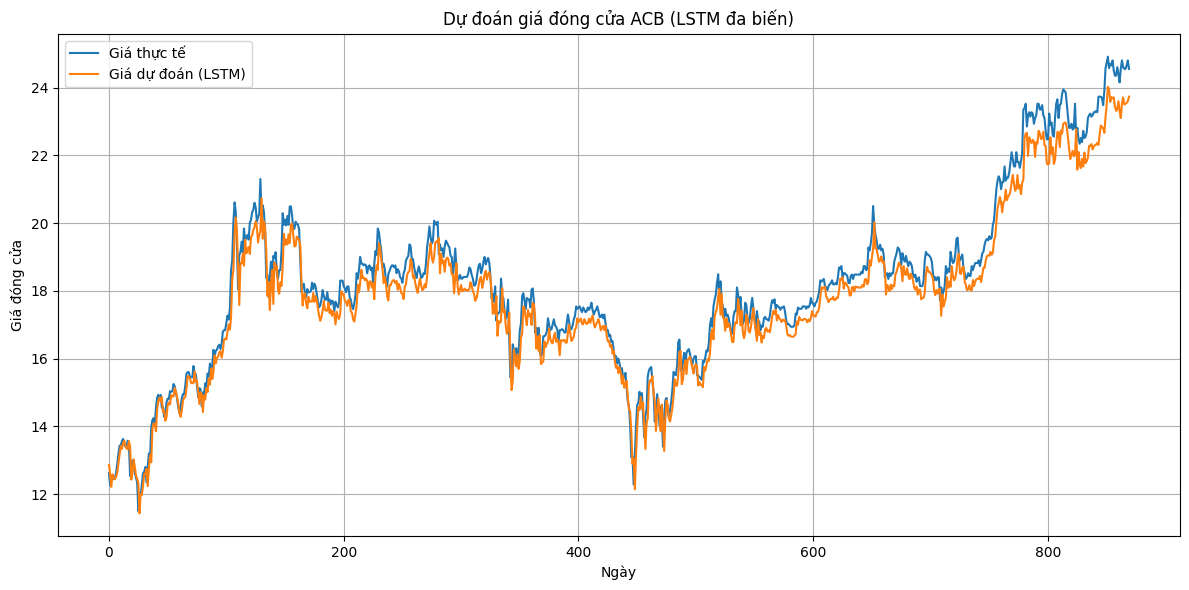

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step

üéØ D·ª± ƒëo√°n gi√° ƒë√≥ng c·ª≠a ACB ng√†y ti·∫øp theo (LSTM): 23.52 VND


In [41]:
# ===== 1. IMPORT TH∆Ø VI·ªÜN =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ===== 2. ƒê·ªåC D·ªÆ LI·ªÜU =====
df = pd.read_csv("gia_lich_su_ohlcv_ACB.csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# ===== 3. CHU·∫®N H√ìA NHI·ªÄU C·ªòT =====
features = ['close', 'volume', 'high', 'low']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# ===== 4. T·∫†O D·ªÆ LI·ªÜU LSTM (ƒëa bi·∫øn) =====
def create_dataset(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # D·ª± ƒëo√°n 'close'
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window_size)

# ===== 5. CHIA TRAIN/TEST =====
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ===== 6. X√ÇY M√î H√åNH LSTM =====
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# ===== 7. D·ª∞ ƒêO√ÅN & T√çNH RMSE =====
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(
    np.concatenate([y_pred, np.zeros((len(y_pred), len(features)-1))], axis=1)
)[:, 0]
y_test_inv = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))], axis=1)
)[:, 0]

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"‚úÖ RMSE tr√™n t·∫≠p test: {rmse:.4f}")

# ===== 8. V·∫º BI·ªÇU ƒê·ªí =====
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Gi√° th·ª±c t·∫ø')
plt.plot(y_pred_inv, label='Gi√° d·ª± ƒëo√°n (LSTM)')
plt.title("D·ª± ƒëo√°n gi√° ƒë√≥ng c·ª≠a ACB (LSTM ƒëa bi·∫øn)")
plt.xlabel("Ng√†y")
plt.ylabel("Gi√° ƒë√≥ng c·ª≠a")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 9. D·ª∞ ƒêO√ÅN GI√Å NG√ÄY MAI =====
last_seq = scaled_data[-window_size:]
last_seq = last_seq.reshape((1, window_size, len(features)))
next_day_scaled = model.predict(last_seq)
next_day_full = np.concatenate([next_day_scaled, np.zeros((1, len(features)-1))], axis=1)
next_day_price = scaler.inverse_transform(next_day_full)[0][0]

print(f"\nüéØ D·ª± ƒëo√°n gi√° ƒë√≥ng c·ª≠a ACB ng√†y ti·∫øp theo (LSTM): {next_day_price:.2f} VND")
